## Практическая работа 2: анализ факторов подписки в финтех-приложении

**Контекст:** у нас есть финтех-приложение + данные о том пользовательском поведении (к примеру о том, проходил ли пользователь верификацию своего номера телефона).

**Цель:** определить, какие факторы потребительского поведения большего всего влияют на принятие пользователям решения об оформлении платной подписки на финансовый сервис (а также определить характер такого влияния: положительный или отрицательный).

**Исследуемые факторы:**
- **age** (возраст пользователя)
- **numscreens** (кол-во просмотренных пользователем страниц приложения)
- **used_premium_feature** (пользователь совершил разовую покупку (add-on) внутри приложения)
- **enrolled** (пользователь оформил регулярную подписку - целевая переменная)
- **liked** (пользователь поставил высокую оценку приложению)
- **location** (пользователь отметил свою геолокацию)
- **verify_phone** (пользователь верифицировал свой номер телефона)
- **bank_verification** (пользователь прошел банковсвую верификацию)
- **verify_date_of_birth** (пользователь верифицировал свою дату рождения)
- **verify_country** (пользователь верифицировал страну, в которой он находится)

Приступим) Начнем с импорта библиотек:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

Загрузим датасет:

In [3]:
df_all_variables = pd.read_csv("clean_FineTech_appData.csv")

Выберем наиболее интересные переменные:

In [5]:
df = df_all_variables[["", 
                      "numscreens", 
                      "used_premium_feature", 
                      "enrolled", 
                      "liked", 
                      "location", 
                      "VerifyPhone",
                      "BankVerification",
                      "VerifyDateOfBirth",
                      "VerifyCountry"]]

In [6]:
df = df.rename(columns = {"numscreens": "number_of_screens", "VerifyPhone": "verify_phone", "BankVerification": "bank_verification", "VerifyDateOfBirth": "verify_date_of_birth", "VerifyCountry": "verify_country"})

Посмотрим на датасет (и увидим, что большинство переменных, в том числе целевая, - это бинарные переменные; только 2 переменные age и numscreens являются непрерывными):

In [7]:
df.head(10)

,age,number_of_screens,used_premium_feature,enrolled,liked,location,verify_phone,bank_verification,verify_date_of_birth,verify_country
0,23,15,0,0,0,0,1,0,1,0
1,24,13,0,0,0,1,1,0,1,1
2,23,3,1,0,1,0,0,0,0,0
3,28,40,0,1,0,1,1,0,1,0
4,31,32,0,1,1,0,1,1,0,1
5,20,14,0,1,0,0,1,0,0,0
6,35,3,0,0,0,0,0,0,0,0
7,26,41,1,0,0,0,1,1,0,1
8,29,33,1,0,0,1,1,1,0,1
9,26,19,0,1,0,1,1,1,1,1


Проверим 1) кол-во наблюдений, 2) кол-во пропусков и 3) тип переменных. Видим, что наблюдений немало, пропусков нет :)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   50000 non-null  int64
 1   number_of_screens     50000 non-null  int64
 2   used_premium_feature  50000 non-null  int64
 3   enrolled              50000 non-null  int64
 4   liked                 50000 non-null  int64
 5   location              50000 non-null  int64
 6   verify_phone          50000 non-null  int64
 7   bank_verification     50000 non-null  int64
 8   verify_date_of_birth  50000 non-null  int64
 9   verify_country        50000 non-null  int64
dtypes: int64(10)
memory usage: 3.8 MB


Оценим ключевые характеристики изучаемых перменных (в первую очередь меры центральной тенденции и меры разброса). Видим, что средний возраст пользователей - 31 год (медианный - 29 лет) - молодежь, в общем. Другая числовая характеристика, кол-во просмотров страниц, в среднем находится на уровне 21 страницы.

Почти половина всех пользователей приобретала подписку - очень неплохой показатель, при этом разовые покупки совершали только 17% пользователей, примерно столько же пользователей ставили высокую оценку приложению. 

Если говорить про остальные метрики, то больше половины пользователей указывали свое местоположение, а также верифицировали свой номер телефона, в то время как банковскую верификацию, верификацию даты рождения и страны пользователи предпочитали не проходить.

In [9]:
df.describe()

,age,number_of_screens,used_premium_feature,enrolled,liked,location,verify_phone,bank_verification,verify_date_of_birth,verify_country
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,31.72436,21.095900,0.172020,0.497000,0.165000,0.517760,0.524600,0.319540,0.473480,0.423160
std,10.80331,15.728812,0.377402,0.499996,0.371184,0.499689,0.499399,0.466303,0.499301,0.494065
min,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,37.00000,28.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df["age"].median()

29.0

In [11]:
df["number_of_screens"].median()

18.0

Для большей наглядности посмотрим на распределение возраста в целом, а также в разрезе признака подписки:

<AxesSubplot:xlabel='age', ylabel='Count'>

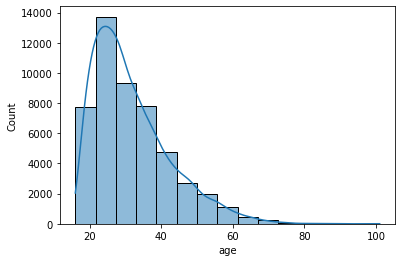

In [12]:
font = {"size": 10}
plt.rc("font", **font)
sns.histplot(df["age"], bins = 15, kde=True)

In [3]:
sns.violinplot(x = df[df["age"] <= 75]["enrolled"], y = df["age"][df["age"] <= 75]) #Сразу исключаем экстремальные значения возраста

NameError: name 'sns' is not defined

Видим, что в целом ядро пользователей финтех-сервиса - это молодые люди в возрасте от 20 до 30 лет. Для наглядности поделим всех пользователей на 2 категории в зависимости от возраста:

In [14]:
df["age_cat"] = df["age"].apply(lambda x: "teenager" if x <= 30 else "adult")

In [15]:
df.groupby("age_cat").mean()

,age,number_of_screens,used_premium_feature,enrolled,liked,location,verify_phone,bank_verification,verify_date_of_birth,verify_country
age_cat,,,,,,,,,,
adult,41.114009,19.240059,0.175190,0.424846,0.164082,0.457280,0.455947,0.282357,0.413116,0.362287
teenager,24.037573,22.615175,0.169425,0.556069,0.165751,0.567272,0.580802,0.349980,0.522897,0.472993


Видно, что молодые люди более расположены к приобретению подписки (56% подписок среди молодежи против 42% подписок у людей постарше) - ожидаем в дальнешем увидеть положительный эффект от переменной age.

Аналогичным образом исследуем распределение кол-ва просмотренных страниц в приложении:

<AxesSubplot:xlabel='number_of_screens', ylabel='Count'>

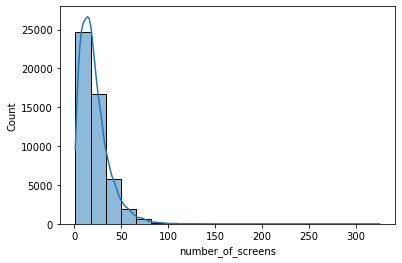

In [16]:
font = {"size": 10}
plt.rc("font", **font)
sns.histplot(df["number_of_screens"], bins = 20, kde=True)

<AxesSubplot:xlabel='enrolled', ylabel='number_of_screens'>

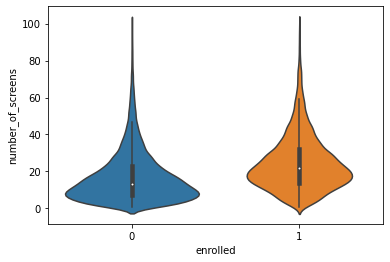

In [17]:
sns.violinplot(x = df[df["number_of_screens"] <= 100]["enrolled"], y = df["number_of_screens"][df["number_of_screens"] <= 100]) #Сразу исключаем экстремальные значения кол-ва просмотренных страниц

In [18]:
df["number_of_screens_cat"] = df["number_of_screens"].apply(lambda x: "many_screens" if x >= df["number_of_screens"].median() else "few_screens")

In [19]:
df.groupby("number_of_screens_cat").mean()

,age,number_of_screens,used_premium_feature,enrolled,liked,location,verify_phone,bank_verification,verify_date_of_birth,verify_country
number_of_screens_cat,,,,,,,,,,
few_screens,33.036810,9.759344,0.143521,0.359530,0.165704,0.331367,0.316215,0.168047,0.312053,0.246677
many_screens,30.438002,32.207081,0.199952,0.631737,0.164310,0.700448,0.728842,0.468021,0.631698,0.596135


Приходим к выводу, что при прочих равных условиях те пользователи, которые просмотраивают больше страниц (проявляют большую активность), больше расположены к оформлению подписки (63% подписок против 36%). Активаия пользователей - это важно, ничего не скажешь.

Дополнительно к отобранным переменным добавим еще одну - verify_all. Это показатель того, что пользователель совершил все верификации (прокси-переменная супер-активного пользователя):

In [20]:
df["verify_all"] = df["verify_phone"] * df["bank_verification"] * df["verify_date_of_birth"] * df["verify_country"]

<AxesSubplot:xlabel='verify_all', ylabel='count'>

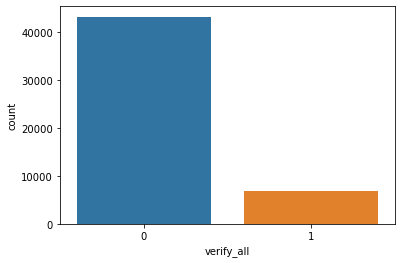

In [21]:
sns.countplot("verify_all", data=df)

Пользователей, которые прошли все верификации, относительно немного.

Перейдем к рассмотрению взаимосвязей между фактором подписки и другими переменными:

In [22]:
df.groupby("enrolled").mean()

,age,number_of_screens,used_premium_feature,liked,location,verify_phone,bank_verification,verify_date_of_birth,verify_country,verify_all
enrolled,,,,,,,,,,
0,33.325964,17.296421,0.189980,0.165646,0.365924,0.303777,0.222107,0.312048,0.297694,0.055388
1,30.103421,24.941247,0.153843,0.164346,0.671429,0.748089,0.418149,0.636861,0.550141,0.216217


Видно, что пользователи с подпиской в меньшей степени склонны к разовым платным покупкам. При этом они более склонны к прохождению разнообразных верификаций. Переменная liked особо не отличается в зависимости от фактора подписки.

Перейдем к визуализации. Сначала посмотрим на распределение независимых переменных в разрезе фактора подписки:

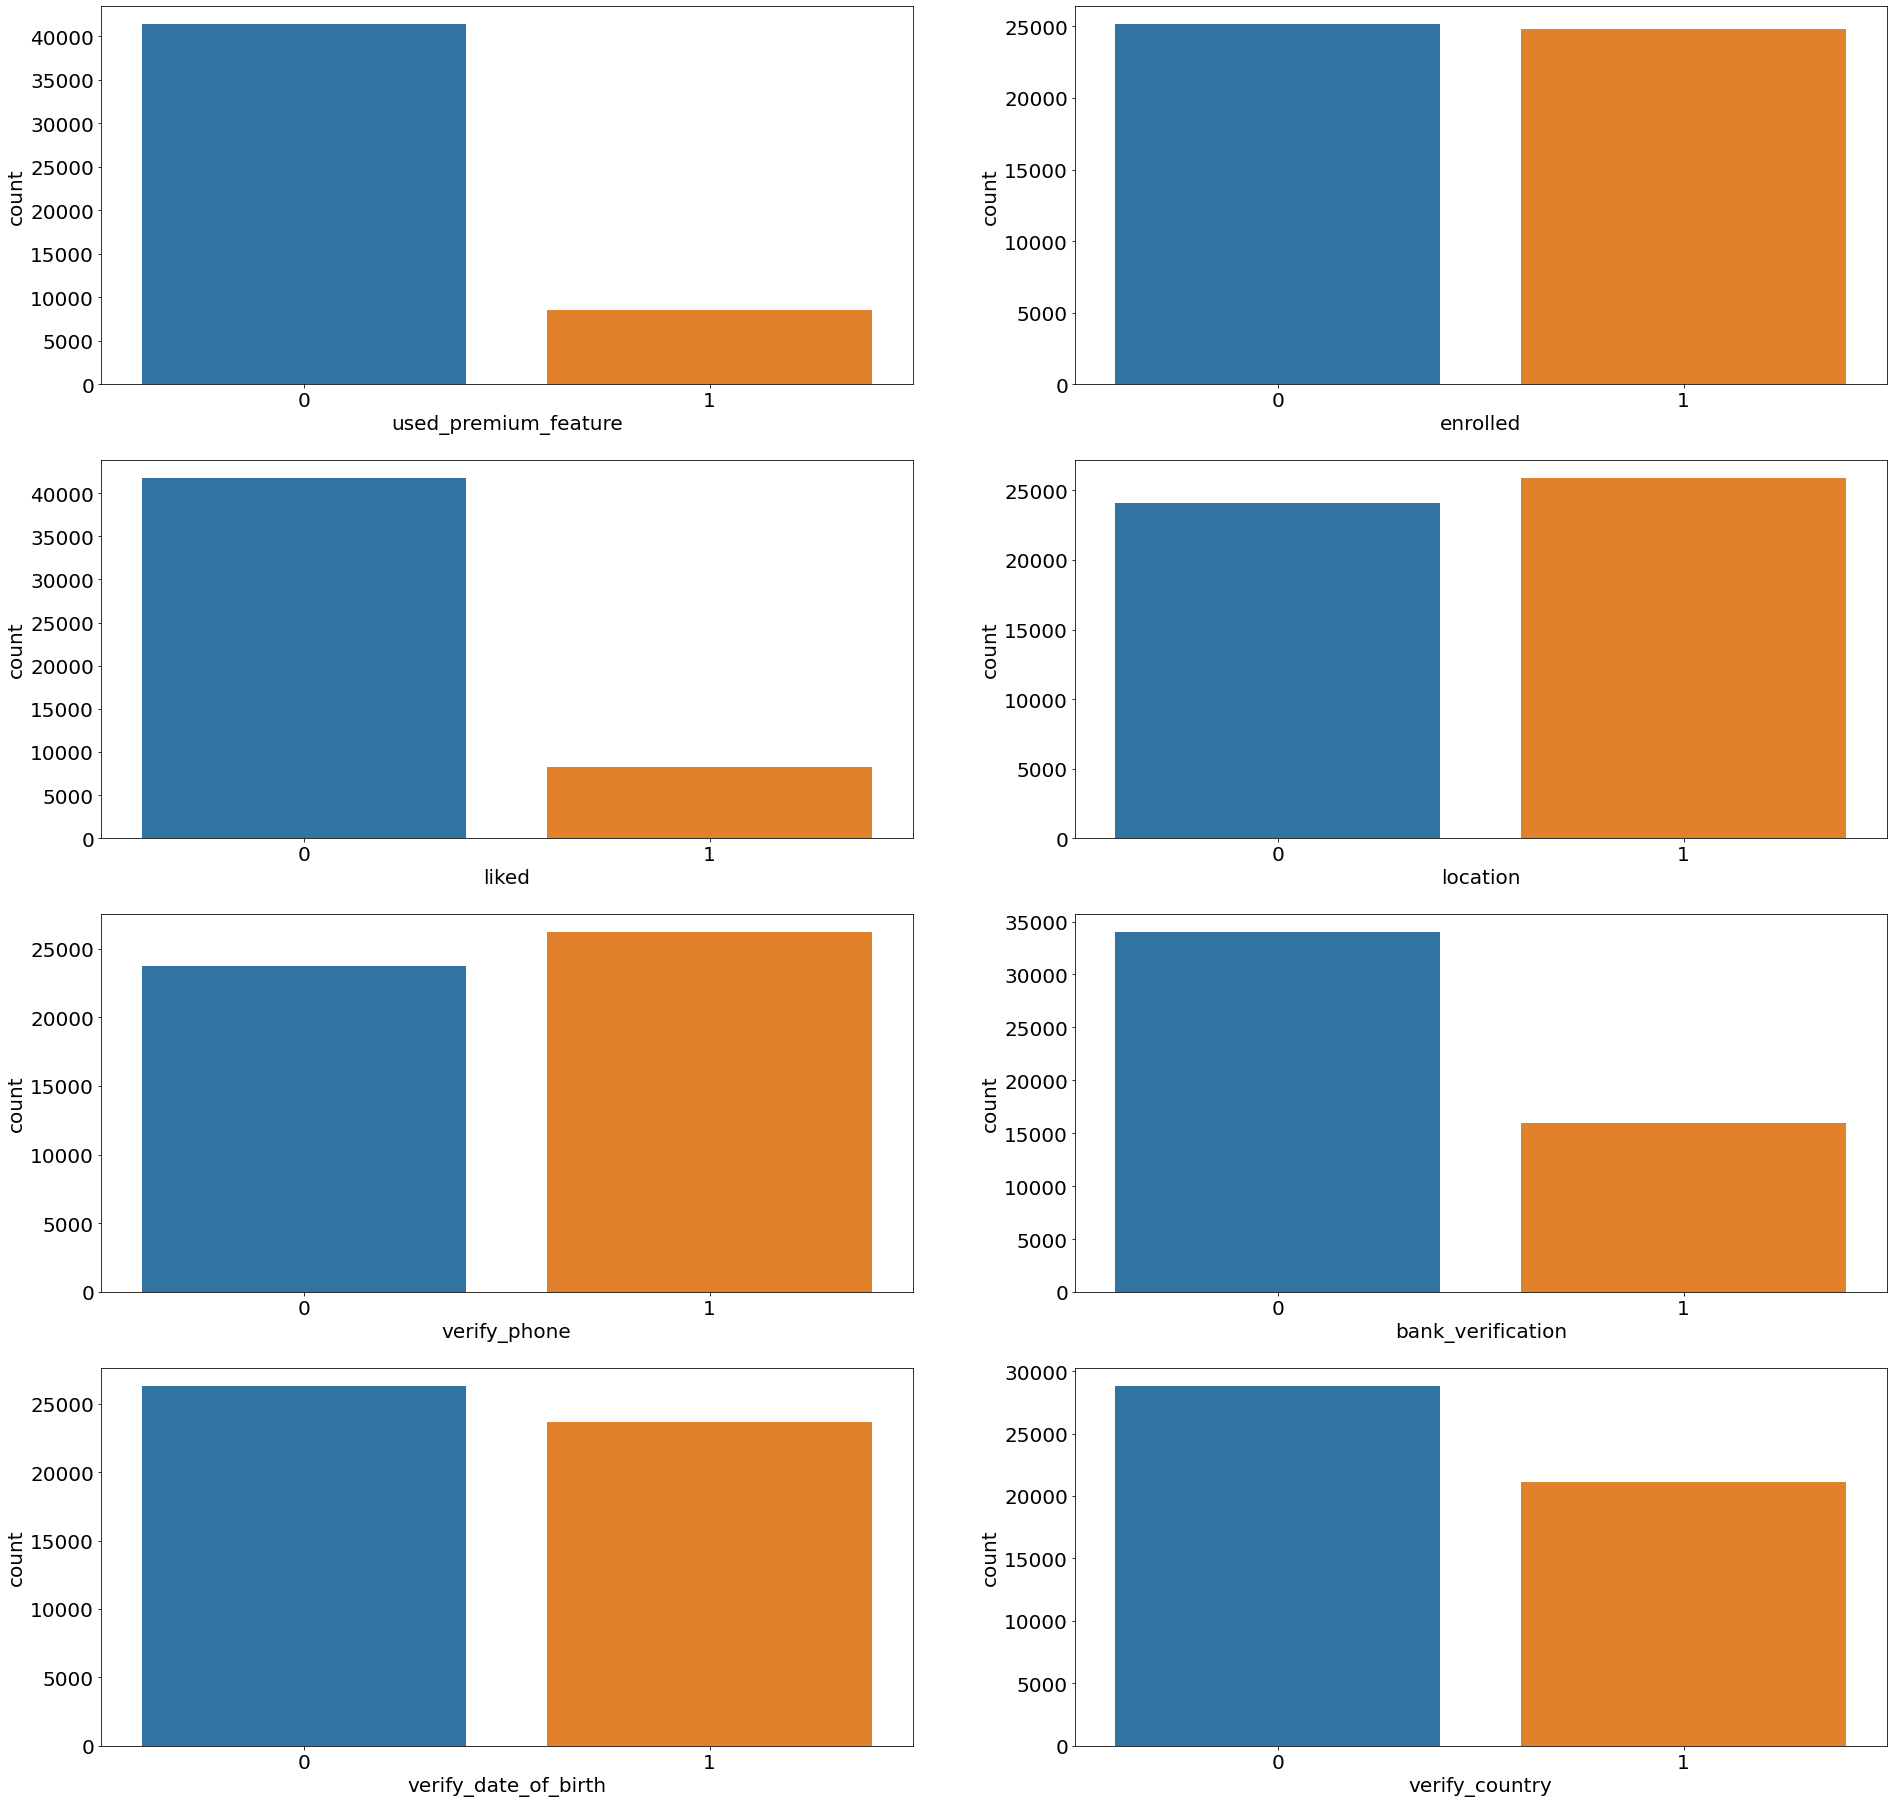

In [23]:
font = {"size": 20}
plt.rc("font", **font)
fig, ax = plt.subplots(4, 2, figsize=(32, 32))
plt.subplot(4, 2, 1)
sns.countplot("used_premium_feature", data=df)
plt.subplot(4, 2, 2)
sns.countplot("enrolled", data=df)
plt.subplot(4, 2, 3)
sns.countplot("liked", data=df)
plt.subplot(4, 2, 4)
sns.countplot("location", data=df)
plt.subplot(4, 2, 5)
sns.countplot("verify_phone", data=df)
plt.subplot(4, 2, 6)
sns.countplot("bank_verification", data=df)
plt.subplot(4, 2, 7)
sns.countplot("verify_date_of_birth", data=df)
plt.subplot(4, 2, 8)
sns.countplot("verify_country", data=df)
plt.show()

Затем перейдем к изучению средней доли подписки в зависимости от различных факторов:

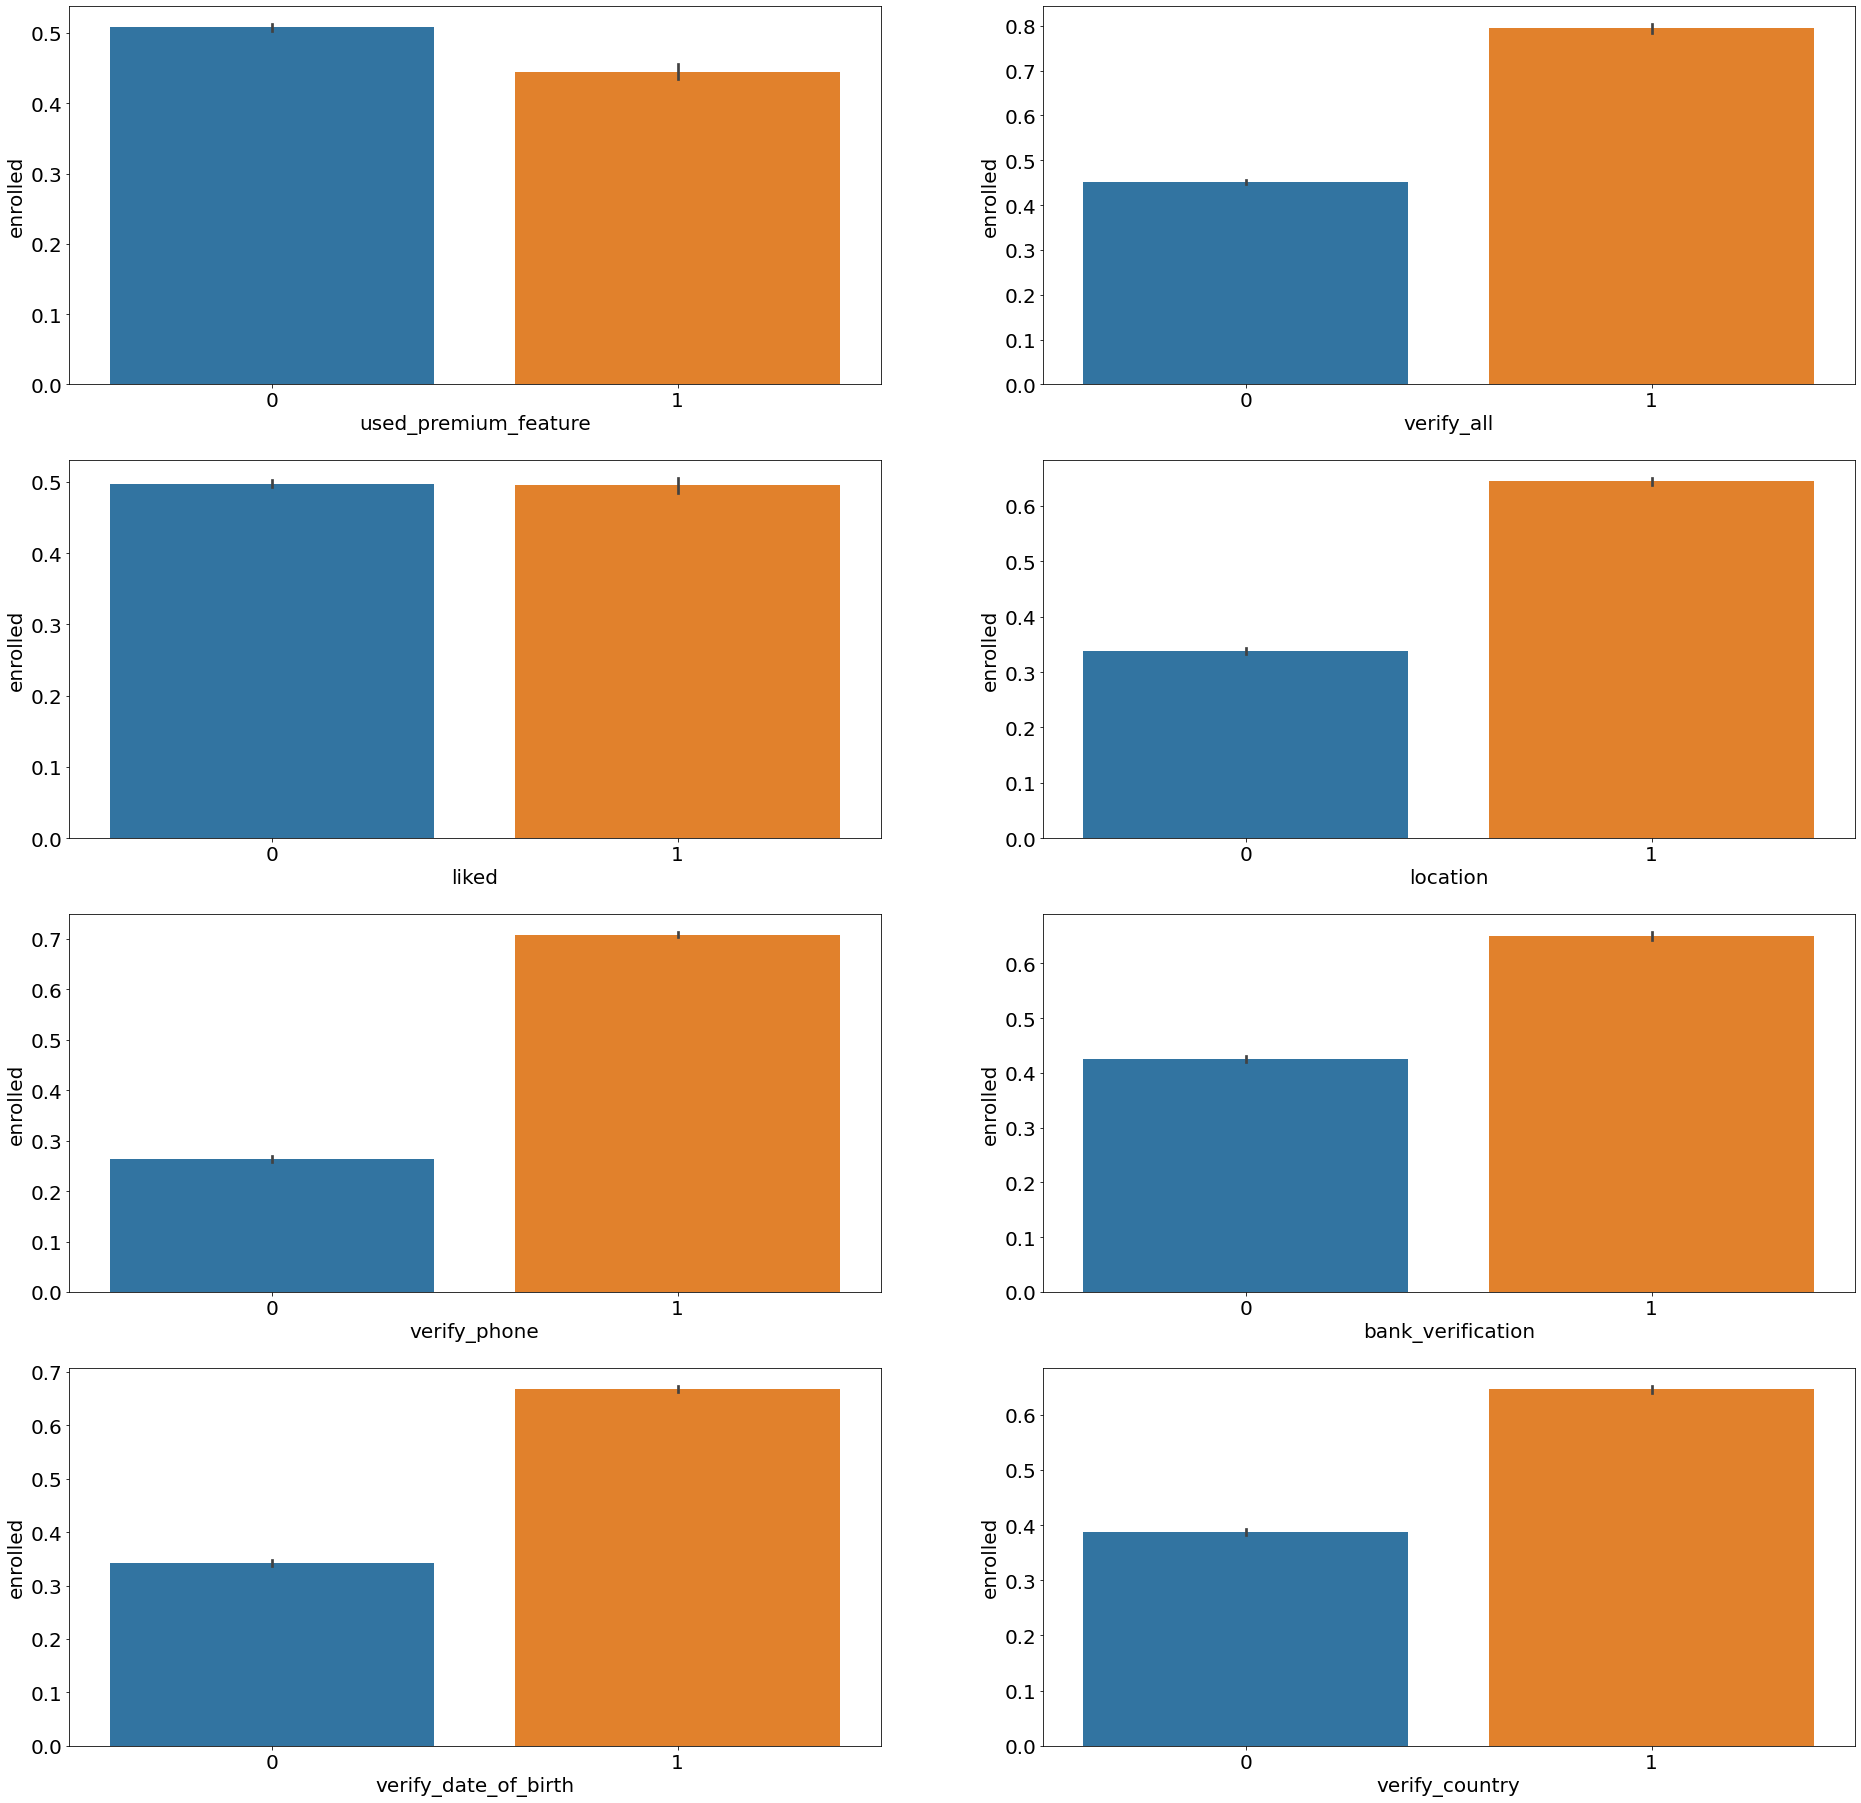

In [24]:
font = {"size": 20}
plt.rc("font", **font)
fig, ax = plt.subplots(4, 2, figsize=(32, 32))
plt.subplot(4, 2, 1)
sns.barplot(x="used_premium_feature", y="enrolled", data=df)
plt.subplot(4, 2, 2)
sns.barplot(x="verify_all", y="enrolled", data=df)
plt.subplot(4, 2, 3)
sns.barplot(x="liked", y="enrolled", data=df)
plt.subplot(4, 2, 4)
sns.barplot(x="location", y="enrolled", data=df)
plt.subplot(4, 2, 5)
sns.barplot(x="verify_phone", y="enrolled", data=df)
plt.subplot(4, 2, 6)
sns.barplot(x="bank_verification", y="enrolled", data=df)
plt.subplot(4, 2, 7)
sns.barplot(x="verify_date_of_birth", y="enrolled", data=df)
plt.subplot(4, 2, 8)
sns.barplot(x="verify_country", y="enrolled", data=df)
plt.show()

Судя по графикам, склонность к подписке различается в зависимости от всех факторов, кроме переменной liked. Проверим это численно, применив хи-квадрат критерий:

In [25]:
scipy.stats.chi2_contingency(df.groupby("used_premium_feature")["enrolled"].value_counts().unstack(), correction = False)

(114.60438749206781,
 9.607329741568696e-27,
 1,
 array([[20823.697, 20575.303],
        [ 4326.303,  4274.697]]))

In [26]:
scipy.stats.chi2_contingency(df.groupby("verify_all")["enrolled"].value_counts().unstack(), correction = False)

(2763.179511688024,
 0.0,
 1,
 array([[21746.702, 21487.298],
        [ 3403.298,  3362.702]]))

In [27]:
scipy.stats.chi2_contingency(df.groupby("liked")["enrolled"].value_counts().unstack(), correction = False)

(0.1533352242959825,
 0.6953682584173018,
 1,
 array([[21000.25, 20749.75],
        [ 4149.75,  4100.25]]))

In [28]:
scipy.stats.chi2_contingency(df.groupby("location")["enrolled"].value_counts().unstack(), correction = False)

(4672.365296290245,
 0.0,
 1,
 array([[12128.336, 11983.664],
        [13021.664, 12866.336]]))

In [29]:
scipy.stats.chi2_contingency(df.groupby("verify_phone")["enrolled"].value_counts().unstack(), correction = False)

(9894.216903954793,
 0.0,
 1,
 array([[11956.31, 11813.69],
        [13193.69, 13036.31]]))

In [30]:
scipy.stats.chi2_contingency(df.groupby("bank_verification")["enrolled"].value_counts().unstack(), correction = False)

(2209.340970255014,
 0.0,
 1,
 array([[17113.569, 16909.431],
        [ 8036.431,  7940.569]]))

In [31]:
scipy.stats.chi2_contingency(df.groupby("verify_date_of_birth")["enrolled"].value_counts().unstack(), correction = False)

(5289.880777583759,
 0.0,
 1,
 array([[13241.978, 13084.022],
        [11908.022, 11765.978]]))

In [32]:
scipy.stats.chi2_contingency(df.groupby("verify_country")["enrolled"].value_counts().unstack(), correction = False)

(3263.4341766896364,
 0.0,
 1,
 array([[14507.526, 14334.474],
        [10642.474, 10515.526]]))

Действительно, во всех случаях (кроме переменной liked), нулевая гипотеза об отсутствии разницы в среднем доле подписок отвергается.

Перейдем к корреляционному анализу (да-да, регрессионный анализ уже близко). Для начала расчитаем корреляцию между 2 числовыми характеристиками age и number_of_screens (перед этим удалим выбросы): 

In [ ]:
q1 = df["number_of_screens"].quantile(0.25)
q3 = df["number_of_screens"].quantile(0.75)
iqr = q3 - q1

In [34]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-17.0
55.0


In [35]:
df_no_outliers = df[df["number_of_screens"] <= iqr_outlier_threshold_up]

In [36]:
df_no_outliers["age"].corr(df_no_outliers["number_of_screens"])

-0.12750953622348296

Видим, что коэффициент корреляции является отрицательным: с возрастом пользователи становятся все менее активными :(

Поиграв с одним коэффициентом, перейдем матрице:

<AxesSubplot:>

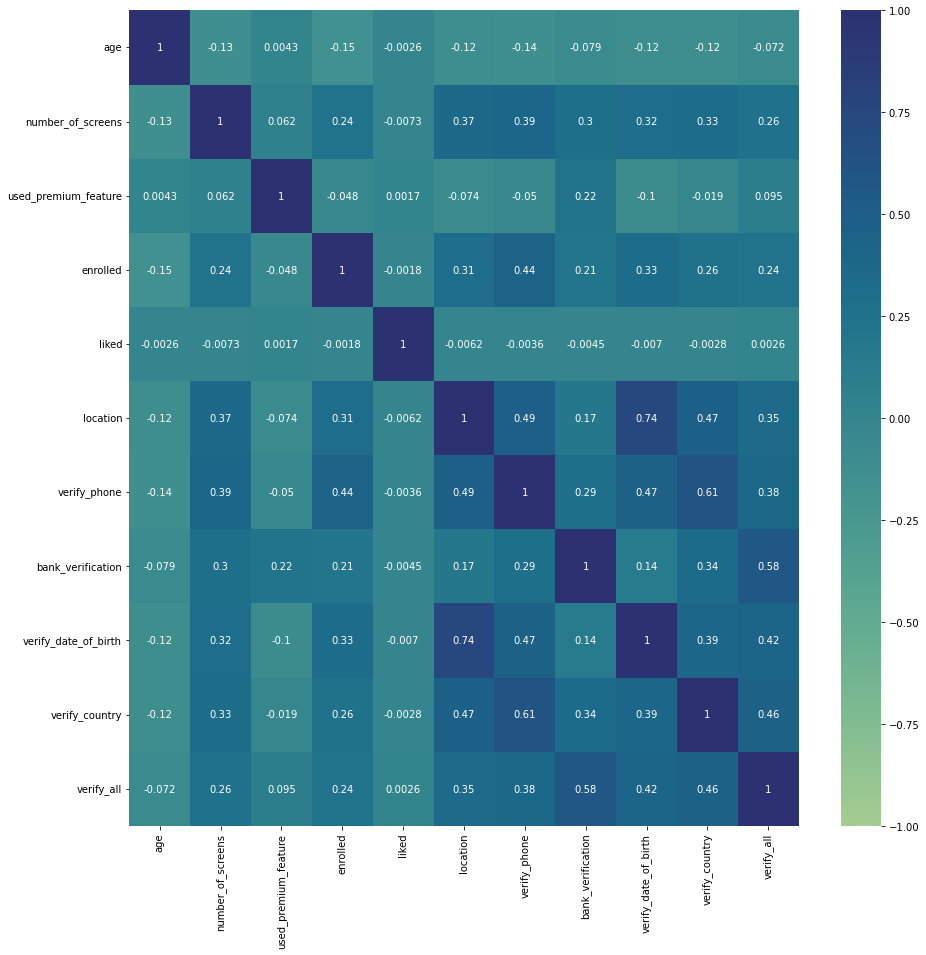

In [37]:
font = {"size": 10}
plt.rc("font", **font)
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="crest") #выбираем красивый сине-зеленый цвет

Также отдельно отсортируем коэффиценты корреляции для нашей целевой переменной:

In [38]:
df.corr()["enrolled"].sort_values(ascending=False)

enrolled                1.000000
verify_phone            0.444842
verify_date_of_birth    0.325265
location                0.305692
verify_country          0.255477
number_of_screens       0.243018
verify_all              0.235082
bank_verification       0.210207
liked                  -0.001751
used_premium_feature   -0.047876
age                    -0.149145
Name: enrolled, dtype: float64

Выводы: возраст и платная покупка внутри приложения (слабо) негативно влияют на принятие решения о подписке. То, что пользователь ставит оценку приложению, особо влияния на подписку не оказывает. Остальные параметры (просмотренные страницы + верификации) положительно связаны с исследуемой переменной.

Что же касается взаимосвязей между регрессорами, то самая сильная положительная корреляция наблюдается между verify_date_of_birth и location (интерпретация что-то не приходит в голову, может у вас появятся идеи). Переменная liked с другими переменными особо не связана, что странно: предполагалось, что факт высокой оценки положительно влияет на вероятность приобрести подписку. 

Перейдем к заключительному этапу - проведению регрессионного анализа. Построим и оценим модель логистической линейной регрессии:

In [39]:
X = sm.add_constant(df.drop(["enrolled", "age_cat", "number_of_screens_cat", "verify_all"], axis=1)) 
y = df["enrolled"]
logit = sm.Logit(y, X)
res = logit.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.567023
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               enrolled   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49990
Method:                           MLE   Df Model:                            9
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.1819
Time:                        23:12:59   Log-Likelihood:                -28351.
converged:                       True   LL-Null:                       -34656.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7374      0.038    -19.370      0.000      -0.812      -0.663
age                     -0.0185      0.001    -19.047      0.000      -0.020      -0.017
number_of_screens        0.0072      0.001      9.430      0.000       0.006       0.009
used_premium_feature    -0.3090      0.029    -10.572      0.000      -0.366      -0.252
liked                    0.0066      0.028      0.240      0.810      -0.047       0.061
location                 0.1318      0.031      4.205      0.000       0.070       0.193
verify_phone             1.6428      0.027     60.381      0.000       1.589       1.696
bank_verification        0.5651      0.024     23.101      0.000       0.517       0.613
verify_date_of_birth     0.6125      0.030     20.528      0.000       0.554       0.671
verify_country          -0.4691      0.028    -16.785      0.000      -0.524      -0.414
========================================================================================
"""

Итак, мы видим, что на любом разумном уровне значимости фактор liked не оказывает влияния на вероятность оформления подписки - странно, но факт.

В число факторов со знаком минус входят переменные:
- age (ожидаемо)
- used_premium_feature (можно понять: если пользователь совершил разовую покупку, он уже получил дополнительную ценность, которой ему скорее всего будет более чем достаточно)
- verify_country (неожиданно - судя по корреляционному анализу), интерепретация остается за скобками

Самый значимый фактор со знаком плюс - это признак верификации номера телефона: судя по расчетам, если при прочих равных условиях пользователь проходит такого рода верификацию, его шансы подписаться на сервис возрастают в более чем 5 раз!

In [40]:
np.exp(1.6428)

5.169624214007683

Для интереса ниже рассматривается парная модель регрессии, в которую в качестве независимой переменнолй входит созданный нами показатель verify_all:

In [41]:
X = sm.add_constant(df["verify_all"])
y = df["enrolled"]
logit = sm.Logit(y, X)
res = logit.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.663910
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               enrolled   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49998
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                 0.04216
Time:                        23:12:59   Log-Likelihood:                -33195.
converged:                       True   LL-Null:                       -34656.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1986      0.010    -20.550      0.000      -0.218      -0.180
verify_all     1.5486      0.032     49.033      0.000       1.487       1.610
==============================================================================
"""

In [42]:
np.exp(1.5486)

4.704878739421934

Видно, что пользователь, который прошел все верификации, повышает свои шансы на подписку в 4,7 раз. Все-таки факт верификации страны почему-то влияет негативно. Это хорошая тема для нового исследования, но это уже совсем другая история.

В заключении короткая рекомендация для создателей финтех-сервиса: мотивируйте своих пользователей активнее пользоваться приложением, упрощайте и поощрайте верификацию)